<a href="https://colab.research.google.com/github/pj0620/Deep-Learning-EMG-Classification/blob/master/archimedes_emg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [448]:
import pandas as pd
import numpy as np
import progressbar
import matplotlib.pyplot as plt

# Pre-processing

#### Load Data

In [449]:
control_raw_data = pd.read_csv('drive/MyDrive/EMG/control.csv', header=None)
clench_raw_data = pd.read_csv('drive/MyDrive/EMG/clench_grabbing_button_short.csv', header=None)

# clench2.csv -> 99.14285714285714
# clench.csv -> 99.2
# clench_grabbing_button.csv -> 100.0%
# clench_grabbing_button_short.csv -> 99.733

control_raw_data.drop(control_raw_data.columns[len(control_raw_data.columns)-1], axis=1, inplace=True)
clench_raw_data.drop(clench_raw_data.columns[len(clench_raw_data.columns)-1], axis=1, inplace=True)

print(control_raw_data.head())

     0     1     2     3     4     5     6     7     8     9   ...    89  \
0  2910  2992  3019  2927  3026  3003  2941  3035  2928  3046  ...  2984   
1  3044  2959  3006  2956  3014  2896  3042  2991  2993  3063  ...  3019   
2  2895  2939  2905  3003  2889  2978  3024  2992  2922  2960  ...  3006   
3  2926  2928  3003  2998  2943  3022  2933  3079  2927  3031  ...  2992   
4  2931  3025  3014  3051  3014  2928  2959  2908  3025  2969  ...  2967   

     90    91    92    93    94    95    96    97    98  
0  3063  2948  3044  2963  2900  2921  2977  2983  2979  
1  2970  3021  2920  2977  2992  3003  2979  3023  2982  
2  2958  3005  2956  2989  3031  3014  3011  2983  3027  
3  2921  2990  2987  3008  2945  3041  2907  2992  2963  
4  2944  2955  2951  2948  2989  2992  2919  2958  2916  

[5 rows x 99 columns]


#### Normalize

In [450]:
def normalize(raw_data):
  # zeroed = raw_data.sub((raw_data.max(axis=1) - raw_data.min(axis=1))/2 + raw_data.min(axis=1), axis=0)
  # scaled = zeroed.div((raw_data.max(axis=1) - raw_data.min(axis=1))/2, axis=0)
  # return scaled

  zeroed = raw_data.sub((raw_data.max() - raw_data.min())/2 + raw_data.min())
  scaled = zeroed.div((raw_data.max() - raw_data.min())/2)
  return scaled

control_data_preprocessed = normalize(control_raw_data)
clench_data_preprocessed = normalize(clench_raw_data)

control_data_preprocessed

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
0,-0.764706,0.170213,0.345455,-0.482759,0.542254,0.033457,-0.044068,0.497630,-0.582609,0.710611,...,0.095541,0.740741,-0.185455,0.581749,-0.347639,-0.362416,-0.609756,0.043478,0.201389,-0.144186
1,0.286275,-0.063830,0.227273,-0.232759,0.457746,-0.762082,0.640678,0.080569,-0.017391,0.819936,...,0.318471,-0.120370,0.345455,-0.361217,-0.227468,0.255034,0.056911,0.056856,0.479167,-0.116279
2,-0.882353,-0.205674,-0.690909,0.172414,-0.422535,-0.152416,0.518644,0.090047,-0.634783,0.157556,...,0.235669,-0.231481,0.229091,-0.087452,-0.124464,0.516779,0.146341,0.270903,0.201389,0.302326
3,-0.639216,-0.283688,0.200000,0.129310,-0.042254,0.174721,-0.098305,0.914692,-0.591304,0.614148,...,0.146497,-0.574074,0.120000,0.148289,0.038627,-0.060403,0.365854,-0.424749,0.263889,-0.293023
4,-0.600000,0.404255,0.300000,0.586207,0.457746,-0.524164,0.077966,-0.706161,0.260870,0.215434,...,-0.012739,-0.361111,-0.134545,-0.125475,-0.476395,0.234899,-0.032520,-0.344482,0.027778,-0.730233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.184314,-0.184397,0.527273,-0.206897,-0.225352,0.412639,-0.118644,-0.184834,-0.034783,0.241158,...,0.343949,0.407407,-0.490909,0.307985,-0.175966,0.221477,-0.317073,-0.210702,-0.076389,0.265116
696,-0.200000,-0.141844,0.227273,-0.379310,0.232394,0.115242,0.491525,-0.516588,-0.452174,0.961415,...,0.178344,-0.583333,0.767273,-0.019011,0.038627,0.114094,-0.154472,-0.003344,0.375000,0.181395
697,-0.592157,0.092199,0.236364,-0.267241,0.380282,-0.509294,-0.159322,0.402844,-0.017391,0.717042,...,0.248408,-0.407407,-0.192727,0.026616,0.158798,-0.087248,0.487805,0.371237,-0.256944,0.376744
698,-0.113725,-0.063830,0.090909,0.482759,-0.147887,0.301115,0.003390,0.090047,0.304348,0.067524,...,0.210191,-0.037037,-0.083636,-0.353612,-0.038627,0.342282,-0.016260,0.344482,0.368056,0.293023


#### Add Classes & Split into test/train/verify data

In [451]:
control_data_labeled = control_data_preprocessed.copy()
clench_data_labeled = clench_data_preprocessed.copy()

control_data_labeled['no_clench'] = 1
control_data_labeled['clench'] = 0

clench_data_labeled['no_clench'] = 0
clench_data_labeled['clench'] = 1

all_data = clench_data_labeled.append(control_data_labeled, ignore_index=True)
all_data = all_data.sample(frac=1, ignore_index=True)
all_data

# shuffle samples
all_data = all_data.sample(frac=1)

per_train = 0.6
per_test = 0.15
N = all_data.shape[0]

train_data  = all_data[:int(per_train*N)]
test_data   = all_data[int(per_train*N):int((per_train+per_test)*N)]
verify_data = all_data[int((per_train+per_test)*N):]

train_data.reset_index(inplace=True, drop=True)
test_data.reset_index(inplace=True, drop=True)
verify_data.reset_index(inplace=True, drop=True)

print(f'train: {train_data.shape}, test: {test_data.shape}, verify: {verify_data.shape}')

train_data

train: (900, 101), test: (225, 101), verify: (375, 101)


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,no_clench,clench
0,0.043137,0.439716,-0.500000,0.267241,-0.190141,0.434944,-0.098305,-0.545024,-0.113043,0.549839,...,0.367273,-0.003802,-0.793991,0.510067,-0.593496,0.117057,0.062500,-0.190698,1,0
1,-0.592157,0.092199,0.236364,-0.267241,0.380282,-0.509294,-0.159322,0.402844,-0.017391,0.717042,...,-0.192727,0.026616,0.158798,-0.087248,0.487805,0.371237,-0.256944,0.376744,1,0
2,-0.647059,0.773050,-0.209091,0.482759,-0.077465,0.330855,0.193220,-0.469194,0.417391,0.331190,...,0.309091,0.087452,-0.072961,-0.067114,0.227642,0.444816,0.104167,0.237209,1,0
3,0.375000,0.825193,0.812977,0.301205,-0.177778,0.388235,-0.105263,-0.263158,-0.183099,0.219512,...,0.270270,0.282051,-0.340659,-0.189873,0.645429,0.518519,0.596091,0.394737,0,1
4,-0.505882,0.390071,-0.845455,0.689655,-0.119718,-0.263941,0.518644,-0.535545,-0.182609,0.363344,...,0.061818,-0.338403,0.038627,0.174497,-0.642276,0.357860,-0.020833,0.265116,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.416667,0.763496,0.828244,0.084337,0.400000,-0.317647,0.500000,-0.315789,0.492958,-0.292683,...,0.000000,0.128205,0.164835,-0.443038,0.822715,-0.129630,0.680782,0.394737,0,1
896,0.395833,0.794344,0.793893,-0.204819,0.377778,-0.058824,0.131579,0.236842,-0.352113,-0.170732,...,-0.351351,0.358974,0.010989,0.113924,0.883657,0.148148,0.674267,0.421053,0,1
897,0.208333,0.742931,0.900763,0.277108,0.044444,0.247059,-0.578947,-0.210526,0.323944,0.073171,...,-0.594595,0.000000,-0.010989,0.367089,0.706371,0.296296,0.752443,0.421053,0,1
898,0.011765,-0.134752,-0.190909,0.086207,0.338028,-0.754647,0.647458,0.535545,-0.426087,0.665595,...,0.840000,-0.231939,0.339056,-0.073826,0.008130,-0.304348,0.562500,-0.172093,1,0


# Feature Extraction 

#### Train AutoEncoder

Epoch 1/200
5/5 [==============================] - 1s 84ms/step - loss: 0.2932 - val_loss: 0.2674
Epoch 2/200
5/5 [==============================] - 0s 22ms/step - loss: 0.2584 - val_loss: 0.2398
Epoch 3/200
5/5 [==============================] - 0s 22ms/step - loss: 0.2336 - val_loss: 0.2195
Epoch 4/200
5/5 [==============================] - 0s 18ms/step - loss: 0.2146 - val_loss: 0.2036
Epoch 5/200
5/5 [==============================] - 0s 21ms/step - loss: 0.1993 - val_loss: 0.1906
Epoch 6/200
5/5 [==============================] - 0s 17ms/step - loss: 0.1865 - val_loss: 0.1794
Epoch 7/200
5/5 [==============================] - 0s 13ms/step - loss: 0.1754 - val_loss: 0.1694
Epoch 8/200
5/5 [==============================] - 0s 13ms/step - loss: 0.1656 - val_loss: 0.1606
Epoch 9/200
5/5 [==============================] - 0s 14ms/step - loss: 0.1569 - val_loss: 0.1529
Epoch 10/200
5/5 [==============================] - 0s 16ms/step - loss: 0.1495 - val_loss: 0.1462
Epoch 11/200
5/5 [=

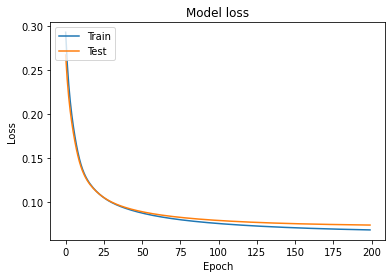

In [452]:
import numpy as np
import progressbar
from keras.layers import Input, Dense, LSTM, RepeatVector, LeakyReLU, Dropout
from keras.models import Model
from keras.utils import plot_model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras import regularizers
from PIL import Image
import numpy as np

latent_dim = 20
input_cols = 99

# build AutoEncoder
inputs = Input(shape=(input_cols,))
encoded = Dense(latent_dim)(inputs)
decoded = Dense(input_cols, name='reconstructed_layer')(encoded)

autoencoder = Model(inputs, decoded)
encoder = Model(inputs, encoded)
autoencoder.compile(optimizer='adam', loss='mse')
# autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

class_columns = ['no_clench', 'clench']
y_train = train_data[class_columns]
x_train = train_data.loc[:, ~train_data.columns.isin(class_columns)]
y_test = test_data[class_columns]
x_test = test_data.loc[:, ~test_data.columns.isin(class_columns)]

history = autoencoder.fit( x_train, x_train,
                          # epochs=20,
                          epochs=200,
                          # batch_size=256,
                          batch_size=200,
                          shuffle=False,
                          validation_data=(x_test, x_test),
                          verbose=1)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [453]:
encoder.predict(x_train)

29/29 [==============================] - 0s 1ms/step


array([[ 0.17543079,  0.22603881, -1.419278  , ...,  0.46842536,
         0.21769093,  0.7686651 ],
       [-0.1841636 , -0.46959418,  0.22144747, ...,  0.3540329 ,
         0.03468209, -0.33924296],
       [-0.51636636,  0.21425967, -0.37769872, ..., -0.20241769,
         1.2744    , -0.25263783],
       ...,
       [-1.558069  ,  1.284247  ,  1.8441864 , ..., -1.4259154 ,
        -0.10837084, -0.89384323],
       [ 0.46820384,  0.01353657, -0.5627489 , ..., -1.0634803 ,
        -0.03937218,  0.7981607 ],
       [-0.00408243, -0.5316162 , -0.86387336, ...,  0.92406017,
         0.3878819 ,  0.17926303]], dtype=float32)

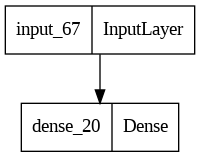

In [454]:
from keras.utils import plot_model
plot_model(encoder,to_file='classification_network.png')

In [455]:
def hjorth_complexity(X):
    Xp = deriv(X)
    if variance(X) == 0:
        raise Exception("Hjorth Mobility of signal is zero, will result in infinite Hjorth Complexity")
    return hjorth_mobility(Xp)/hjorth_mobility(X)

def hjorth_mobility(X):
    Xp = deriv(X)
    if variance(X) == 0:
        raise Exception("variance of signal is zero, will result in infinite Hjorth Mobility")
    return (variance(Xp)/variance(X))**0.5

def deriv(X):
    Xp = np.zeros(shape=(X.shape[0]-1))
    for k in range(X.shape[0]-1):
        Xp[k] = (X[k+1]-X[k])
    return Xp

def variance(X):
    return np.var(X)

def simple_square_integral(X):
    return np.square(X).sum()

def willison_amplitude(X,threshold=0):
    WA = 0
    for k in range(X.shape[0]-1):
        if abs(X[k+1]-X[k]) > threshold:
            WA += 1
    return WA/X.shape[0]

def root_mean_square(X):
    return ((1/X.shape[0])*np.square(X).sum())**0.5

def mean(X):
    return X.sum()/X.shape[0]

def slope_sign_changes(X,threshold=0):
    SSC = 0
    for k in range(1,len(X)-1):
        if (X[k]-X[k-1])*(X[k]-X[k+1]) > threshold:
            SSC += 1
    return SSC / X.shape[0]

def zero_crossing(X,threshold=0):
    ZC = 0
    for k in range(len(X)-1):
        if (X[k] > 0 and X[k+1] < 0) or (X[k] < 0 and X[k+1] > 0 and abs(X[k]-X[k+1])>threshold):
            ZC += 1
    return ZC

def waveform_length(X):
    WL = 0
    for i in range(len(X)-1):
        WL += abs(X[i+1]-X[i])
    return WL

def mean_absolute_value(X):
    return (1/X.shape[0])*np.absolute(X).sum()

def extract_predefined_features(raw_data):
    output_data = None
    feature_funcs = [mean_absolute_value,
                     waveform_length,
                     zero_crossing,
                     slope_sign_changes,
                     mean,
                     root_mean_square,
                     willison_amplitude,
                     simple_square_integral,
                     variance,
                     hjorth_mobility,
                     hjorth_complexity]

    feature_funcs_cols = ['mean_absolute_value',
                     'waveform_length',
                     'zero_crossing',
                     'slope_sign_changes',
                     'mean',
                     'root_mean_square',
                     'willison_amplitude',
                     'simple_square_integral',
                     'variance',
                     'hjorth_mobility',
                     'hjorth_complexity']

    new_data = None

    for index, row in raw_data.iterrows():
      signal = row.to_numpy()
      predefined_features =[]
      for feature_func in feature_funcs:
          predefined_features += [feature_func(signal)]
      if new_data is None:
        new_data = predefined_features
      else:
        new_data = np.vstack((new_data,predefined_features))

    return pd.DataFrame(new_data, columns = feature_funcs_cols)

def extract_features(raw_data):
  class_columns = ['no_clench', 'clench']
  only_data = raw_data.loc[:, ~raw_data.columns.isin(class_columns)]
  only_classes = raw_data[class_columns]
  autoencoded_features = encoder.predict(only_data)
  autoencoded_df = pd.DataFrame(autoencoded_features)
  predef_features = extract_predefined_features(only_data)
  return autoencoded_df.join(predef_features).join(only_classes)
  # return raw_data

train_features = extract_features(train_data)
test_features = extract_features(test_data)
verify_features = extract_features(verify_data)

num_cols = train_features.shape[1] - 2

train_features

12/12 [==============================] - 0s 2ms/step


,0,1,2,3,4,5,6,7,8,9,...,slope_sign_changes,mean,root_mean_square,willison_amplitude,simple_square_integral,variance,hjorth_mobility,hjorth_complexity,no_clench,clench
0,0.175431,0.226039,-1.419278,-0.156984,1.763099,-0.397021,-0.724135,0.833560,0.108213,-0.399044,...,0.737374,-0.038869,0.402624,0.989899,16.048476,0.160595,1.640578,1.108019,1,0
1,-0.184164,-0.469594,0.221447,0.637243,0.684592,-0.881269,-0.343386,0.909032,-0.767803,-0.029950,...,0.727273,-0.017635,0.378008,0.989899,14.146148,0.142579,1.540928,1.155567,1,0
2,-0.516366,0.214260,-0.377699,0.010412,0.299455,0.151273,0.005488,1.100366,-0.551440,-0.705152,...,0.707071,0.053073,0.361423,0.989899,12.932065,0.127810,1.632568,1.129662,1,0
3,-0.785166,0.745447,2.178017,-1.096309,1.376893,-1.160824,-0.645634,-0.391386,0.205397,-0.206933,...,0.636364,0.131472,0.451590,0.989899,20.189433,0.186649,1.500669,1.195835,0,1
4,0.100581,-0.201366,0.183967,0.266607,0.317822,-0.940197,-1.176620,1.066087,-0.324634,-0.080255,...,0.696970,-0.058741,0.411126,0.979798,16.733457,0.165574,1.634441,1.112700,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,-1.544713,0.090535,2.556072,-0.266557,0.604014,-1.139230,-0.106805,-1.479008,-0.410529,-0.275126,...,0.737374,0.105412,0.459887,0.989899,20.938103,0.200384,1.529913,1.197243,0,1
896,0.312650,-0.067376,2.664687,-0.534374,0.533987,-1.899283,-0.683004,-1.657490,0.089671,0.784870,...,0.616162,0.175216,0.489102,0.989899,23.682866,0.208520,1.457625,1.209277,0,1
897,-1.558069,1.284247,1.844186,-1.286663,0.797222,-0.567725,0.595535,-1.574782,0.078521,0.028493,...,0.737374,0.131093,0.460055,0.989899,20.953401,0.194465,1.395958,1.264148,0,1
898,0.468204,0.013537,-0.562749,-1.096632,-0.384589,-0.180206,0.491760,0.532033,-0.451209,-1.075380,...,0.727273,0.011414,0.391109,0.989899,15.143681,0.152836,1.582518,1.149871,1,0


# Build Model

Epoch 1/50
4/4 [==============================] - 1s 85ms/step - loss: 2.1612 - accuracy: 0.4678 - val_loss: 1.8375 - val_accuracy: 0.4711
Epoch 2/50
4/4 [==============================] - 0s 17ms/step - loss: 1.7305 - accuracy: 0.4700 - val_loss: 1.4044 - val_accuracy: 0.4711
Epoch 3/50
4/4 [==============================] - 0s 15ms/step - loss: 1.3166 - accuracy: 0.5011 - val_loss: 1.0181 - val_accuracy: 0.4711
Epoch 4/50
4/4 [==============================] - 0s 16ms/step - loss: 1.0784 - accuracy: 0.4833 - val_loss: 0.7465 - val_accuracy: 0.4711
Epoch 5/50
4/4 [==============================] - 0s 16ms/step - loss: 0.8708 - accuracy: 0.4922 - val_loss: 0.6466 - val_accuracy: 0.8178
Epoch 6/50
4/4 [==============================] - 0s 15ms/step - loss: 0.7930 - accuracy: 0.7322 - val_loss: 0.6195 - val_accuracy: 0.5822
Epoch 7/50
4/4 [==============================] - 0s 15ms/step - loss: 0.8018 - accuracy: 0.5644 - val_loss: 0.5864 - val_accuracy: 0.5289
Epoch 8/50
4/4 [===========

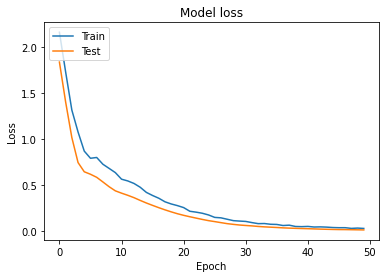

In [456]:
from keras.layers import Dropout
import random
from keras.models import Sequential, Model
from keras.layers import * 


input_nn = Input(shape=(num_cols,))
hidden = Dense(num_cols, activation='relu',name='hidden1')(input_nn)
hidden = Dropout(0.1)(hidden)
# hidden = Dropout(0.04)(hidden)
# hidden = Dense(125, activation='relu')(hidden)
# hidden = Dropout(0.07)(hidden)
# hidden = Dense(130, activation='relu')(hidden)
hidden = Dense(num_cols, activation='relu',name='hidden3')(hidden)
output_nn = Dense(2, activation='sigmoid', name='predicted_class')(hidden)

neural_network = Model(input_nn, output_nn)
neural_network.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

class_columns = ['no_clench', 'clench']
y_train = train_features[class_columns]
x_train = train_features.loc[:, ~train_features.columns.isin(class_columns)]
y_test = test_features[class_columns]
x_test = test_features.loc[:, ~test_features.columns.isin(class_columns)]


history = neural_network.fit(x_train, y_train,
                             epochs=50,
                             # batch_size=256,
                             batch_size=250,
                             shuffle=True,
                             validation_data=(x_test, y_test),
                             verbose=1)

print("history = " + str(history.history))

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

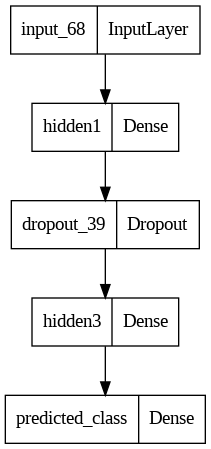

In [457]:
from keras.utils import plot_model
plot_model(neural_network,to_file='classification_network.png')

# Train Model

# Verify Model

In [458]:
class_columns = ['no_clench', 'clench']
y_verify = verify_features[class_columns].to_numpy()
x_verify = verify_features.loc[:, ~verify_features.columns.isin(class_columns)]

print(f'verify shape: {verify_features.shape}')

predicts = neural_network.predict(x_verify)
prediction_col = np.zeros(shape=(predicts.shape[0],1))
num_correct = 0
confusion_matrix = np.zeros(shape=(2,2))

for i in range(predicts.shape[0]):
  # print(predicts[i])
  is_clutched_predict = 0
  if predicts[i][0] < predicts[i][1]:
    is_clutched_predict = 1
  # print(f'is_clutched_predict: {is_clutched_predict}')
  
  # is_clutched_actual = 0
  # if predicts[i][0] < predicts[i][1]:

  # print(y_verify[i])
  is_clutched_real = 0
  if y_verify[i][0] < y_verify[i][1]:
    is_clutched_real = 1
  # print(f'is_clutched_real: {is_clutched_real}')

  confusion_matrix[is_clutched_real,is_clutched_predict] += 1

  if is_clutched_predict == is_clutched_real:
    num_correct += 1
  
print(confusion_matrix)
print(f"testing accuracy = {100*(num_correct/predicts.shape[0])}%")

verify shape: (375, 33)
12/12 [==============================] - 0s 3ms/step
[[177.   1.]
 [  0. 197.]]
testing accuracy = 99.73333333333333%


# Saving/Loading model to disk

In [462]:
# serialize model to JSON
model_json = neural_network.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
neural_network.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [465]:
from tensorflow.keras.models import Sequential, model_from_json

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk
